In [1]:
%matplotlib inline

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

In [2]:
def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random_normal(shape=size, stddev=xavier_stddev)

In [5]:
X = tf.placeholder(tf.float32, shape=[None, 784])

D_W1 = tf.Variable(xavier_init([784, 128]))
D_b1 = tf.Variable(tf.zeros(shape=[128]))

D_W2 = tf.Variable(xavier_init([128, 1]))
D_b2 = tf.Variable(tf.zeros(shape=[1]))

theta_D = [D_W1, D_b1, D_W2, D_b2]

In [6]:
Z = tf.placeholder(tf.float32, shape=[None, 100])

G_W1 = tf.Variable(xavier_init([100, 128]))
G_b1 = tf.Variable(tf.zeros(shape=[128]))

G_W2 = tf.Variable(xavier_init([128, 784]))
G_b2 = tf.Variable(tf.zeros(shape=[784]))

theta_G = [G_W1, G_b1, G_W2, G_b2]

In [7]:
def sample_Z(m, n):
    return np.random.uniform(-1., 1., size=[m,n])

def generator(z):
    G_h1 = tf.nn.relu(tf.matmul(z, G_W1) + G_b1)
    G_out = tf.nn.sigmoid(tf.matmul(G_h1, G_W2) + G_b2)
    return G_out

def discriminator(x):
    D_h1 = tf.nn.relu(tf.matmul(x, D_W1) + D_b1)
    D_logit = tf.matmul(D_h1, D_W2) + D_b2  # logistic regression
    # D_out = tf.nn.sigmoid(D_logit)   # activation functino
    return D_logit


    

In [12]:
G_sample = generator(Z)
D_logit_real = discriminator(X)
D_logit_fake = discriminator(G_sample)

D_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_real, labels=tf.ones_like(D_logit_real)))   # Train to be True
D_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_fake, labels=tf.zeros_like(D_logit_fake)))  # Train to be False

D_loss = D_loss_real + D_loss_fake
G_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_fake, labels=tf.ones_like(D_logit_fake)))        # Train to be True

D_solver = tf.train.AdamOptimizer().minimize(D_loss, var_list=theta_D)
G_solver = tf.train.AdamOptimizer().minimize(G_loss, var_list=theta_G)

In [15]:
batch_size = 128
Z_dim = 100

mnist = input_data.read_data_sets('../../MNIST_data', one_hot=True)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

if not os.path.exists('out/'):
    os.makedirs('out/')

Extracting ../../MNIST_data/train-images-idx3-ubyte.gz
Extracting ../../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../MNIST_data/t10k-labels-idx1-ubyte.gz


In [16]:
def plot(samples):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')

    return fig

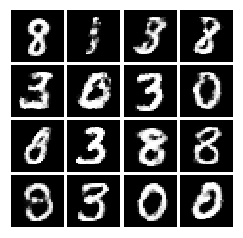

iter: 0
D loss: 0.2939
G loss: 3.068



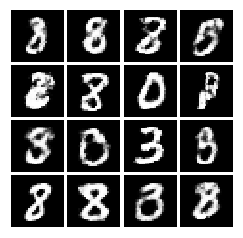

iter: 1000
D loss: 0.3528
G loss: 3.312



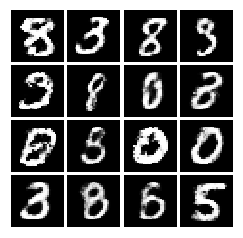

iter: 2000
D loss: 0.3729
G loss: 3.568



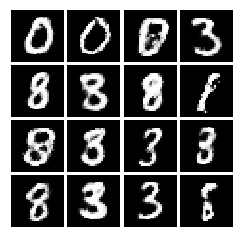

iter: 3000
D loss: 0.3425
G loss: 4.321



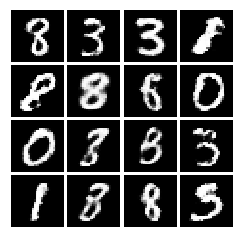

iter: 4000
D loss: 0.3343
G loss: 4.088



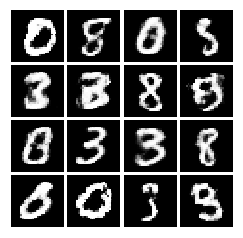

iter: 5000
D loss: 0.3105
G loss: 4.284



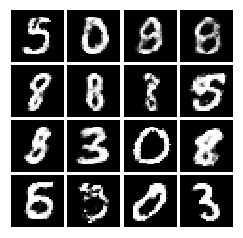

iter: 6000
D loss: 0.2562
G loss: 4.593



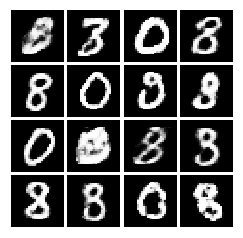

iter: 7000
D loss: 0.2741
G loss: 5.263



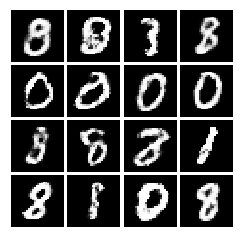

iter: 8000
D loss: 0.2794
G loss: 5.093



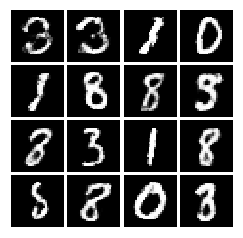

iter: 9000
D loss: 0.3735
G loss: 4.191



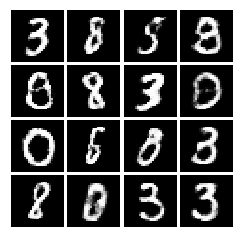

iter: 10000
D loss: 0.3459
G loss: 4.087



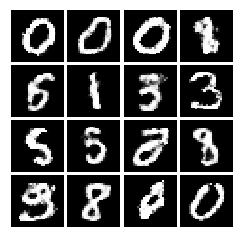

iter: 11000
D loss: 0.2591
G loss: 4.465



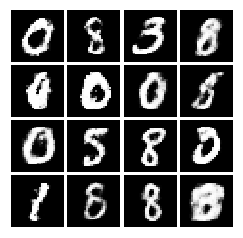

iter: 12000
D loss: 0.4089
G loss: 4.481



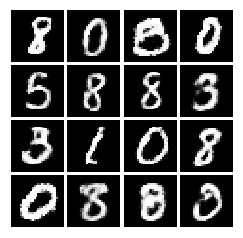

iter: 13000
D loss: 0.3791
G loss: 4.438



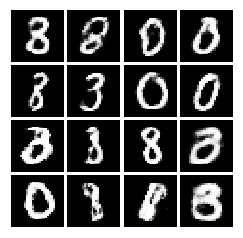

iter: 14000
D loss: 0.2133
G loss: 3.978



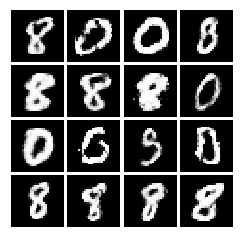

iter: 15000
D loss: 0.321
G loss: 4.662



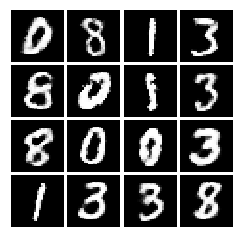

iter: 16000
D loss: 0.2372
G loss: 4.821



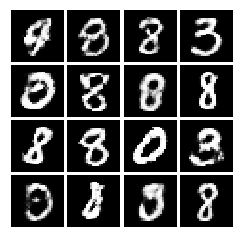

iter: 17000
D loss: 0.3967
G loss: 3.883



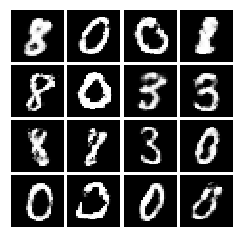

iter: 18000
D loss: 0.384
G loss: 4.074



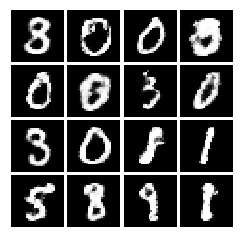

iter: 19000
D loss: 0.1807
G loss: 4.349



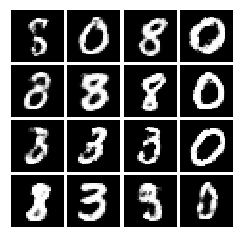

iter: 20000
D loss: 0.2867
G loss: 3.968



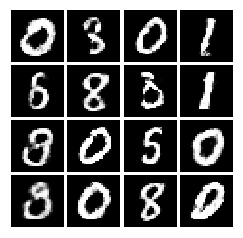

iter: 21000
D loss: 0.3909
G loss: 4.01



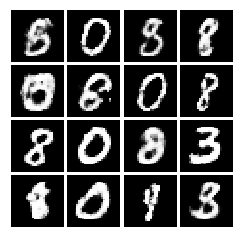

iter: 22000
D loss: 0.2406
G loss: 4.124



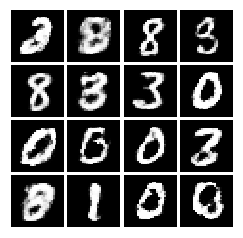

iter: 23000
D loss: 0.3557
G loss: 4.418



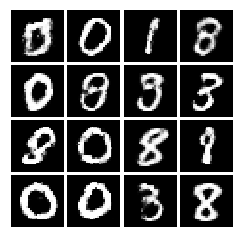

iter: 24000
D loss: 0.3315
G loss: 3.888



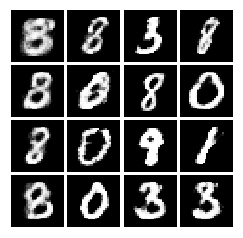

iter: 25000
D loss: 0.3177
G loss: 4.507



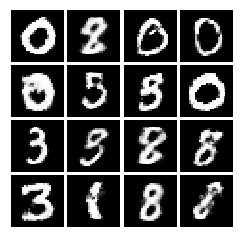

iter: 26000
D loss: 0.2733
G loss: 4.206



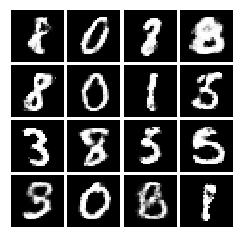

iter: 27000
D loss: 0.3535
G loss: 3.969



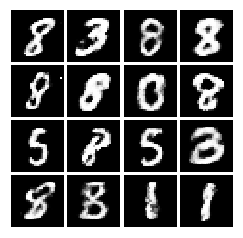

iter: 28000
D loss: 0.2897
G loss: 3.855



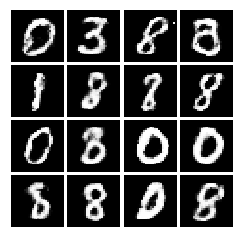

iter: 29000
D loss: 0.1542
G loss: 4.894



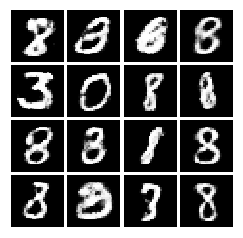

iter: 30000
D loss: 0.2577
G loss: 3.917



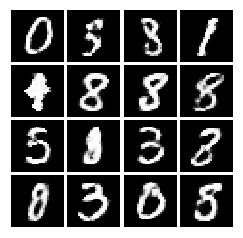

iter: 31000
D loss: 0.2039
G loss: 4.431



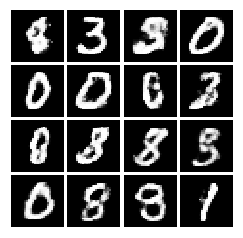

iter: 32000
D loss: 0.4028
G loss: 4.138



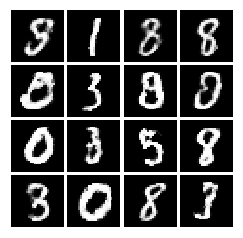

iter: 33000
D loss: 0.251
G loss: 4.272



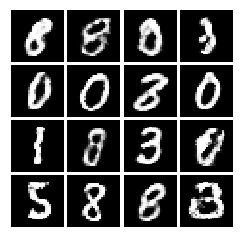

iter: 34000
D loss: 0.3147
G loss: 4.21



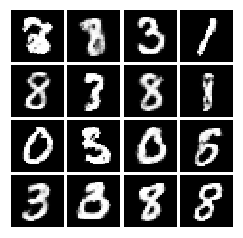

iter: 35000
D loss: 0.2556
G loss: 3.958



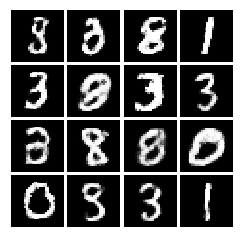

iter: 36000
D loss: 0.2164
G loss: 4.207



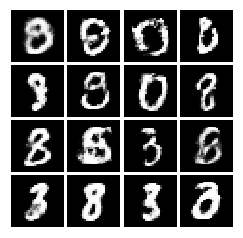

iter: 37000
D loss: 0.2263
G loss: 3.501



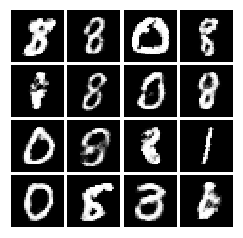

iter: 38000
D loss: 0.2798
G loss: 3.666



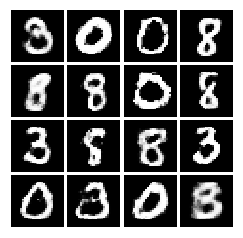

iter: 39000
D loss: 0.3159
G loss: 4.13



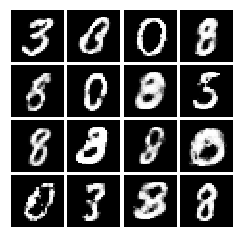

iter: 40000
D loss: 0.2771
G loss: 4.454



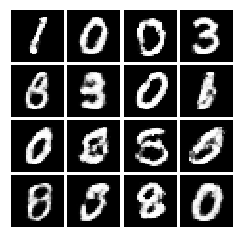

iter: 41000
D loss: 0.2935
G loss: 4.282



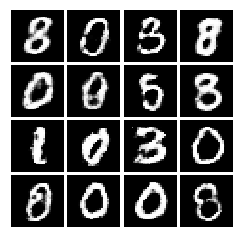

iter: 42000
D loss: 0.3937
G loss: 4.969



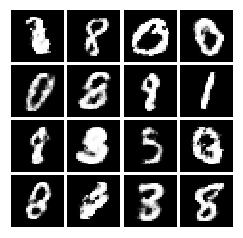

iter: 43000
D loss: 0.2347
G loss: 4.549



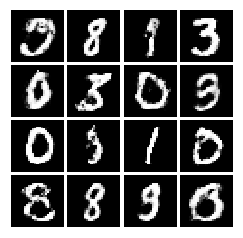

iter: 44000
D loss: 0.2526
G loss: 4.223



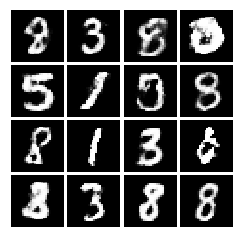

iter: 45000
D loss: 0.3064
G loss: 4.603



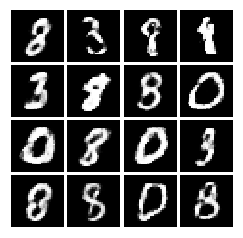

iter: 46000
D loss: 0.3303
G loss: 4.614



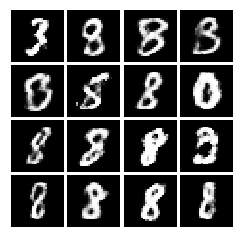

iter: 47000
D loss: 0.326
G loss: 4.307



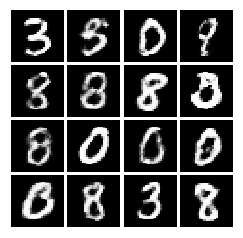

iter: 48000
D loss: 0.2548
G loss: 4.433



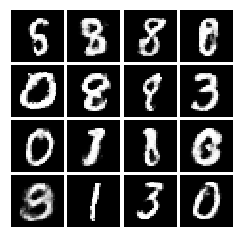

iter: 49000
D loss: 0.3578
G loss: 4.181



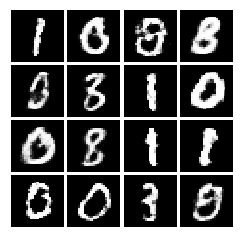

iter: 50000
D loss: 0.2365
G loss: 4.599



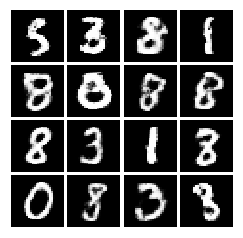

iter: 51000
D loss: 0.3661
G loss: 3.879



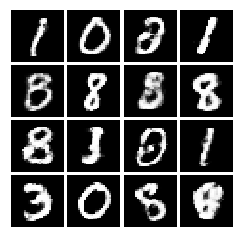

iter: 52000
D loss: 0.3844
G loss: 3.403



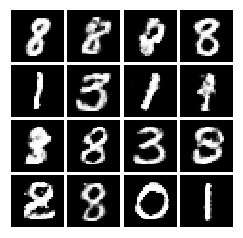

iter: 53000
D loss: 0.4819
G loss: 4.206



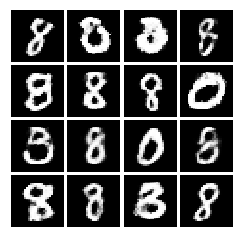

iter: 54000
D loss: 0.2643
G loss: 4.135



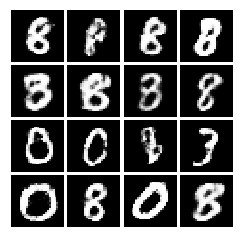

iter: 55000
D loss: 0.2769
G loss: 4.934



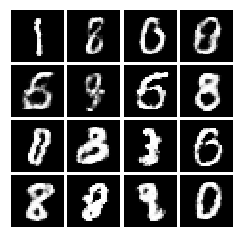

iter: 56000
D loss: 0.1815
G loss: 4.343



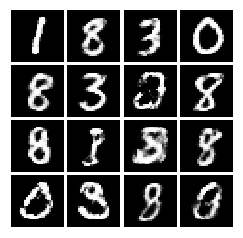

iter: 57000
D loss: 0.2444
G loss: 4.231



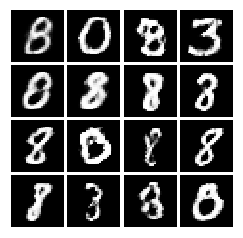

iter: 58000
D loss: 0.3917
G loss: 4.247



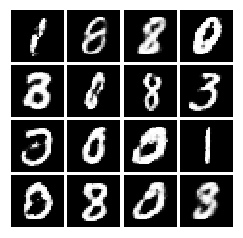

iter: 59000
D loss: 0.2396
G loss: 4.702



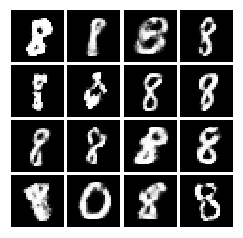

iter: 60000
D loss: 0.2785
G loss: 3.707



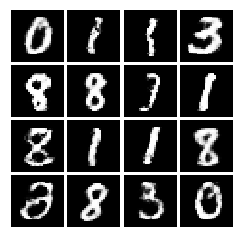

iter: 61000
D loss: 0.3012
G loss: 4.422



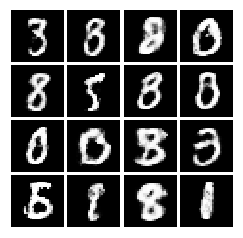

iter: 62000
D loss: 0.3559
G loss: 4.028



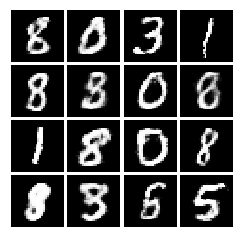

iter: 63000
D loss: 0.4657
G loss: 4.855



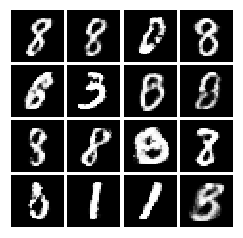

iter: 64000
D loss: 0.2815
G loss: 4.396



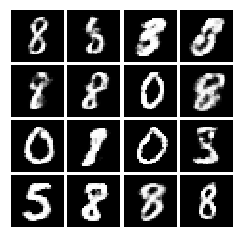

iter: 65000
D loss: 0.2692
G loss: 4.456



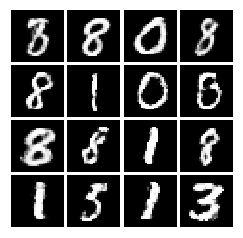

iter: 66000
D loss: 0.3095
G loss: 4.332



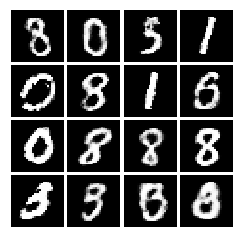

iter: 67000
D loss: 0.1845
G loss: 4.938



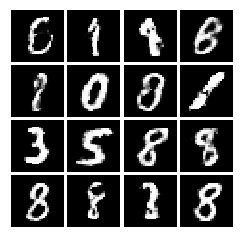

iter: 68000
D loss: 0.3591
G loss: 4.164



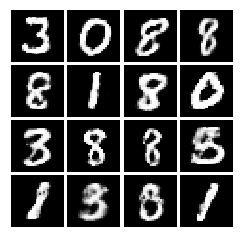

iter: 69000
D loss: 0.2159
G loss: 3.953



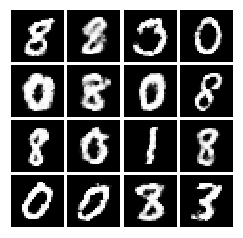

iter: 70000
D loss: 0.3776
G loss: 4.014



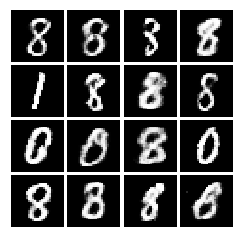

iter: 71000
D loss: 0.2275
G loss: 5.486



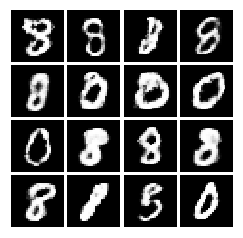

iter: 72000
D loss: 0.3054
G loss: 3.71



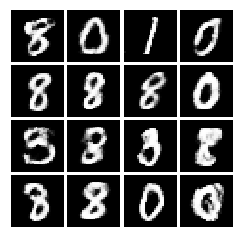

iter: 73000
D loss: 0.2053
G loss: 4.313



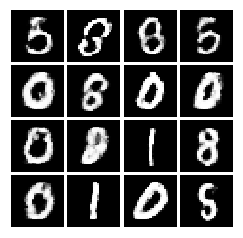

iter: 74000
D loss: 0.2486
G loss: 4.176



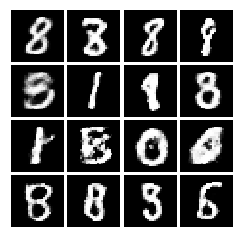

iter: 75000
D loss: 0.3592
G loss: 4.058



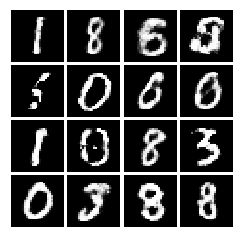

iter: 76000
D loss: 0.1804
G loss: 4.241



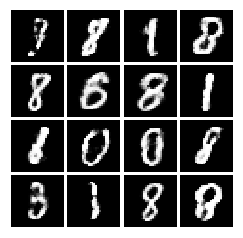

iter: 77000
D loss: 0.3025
G loss: 4.334



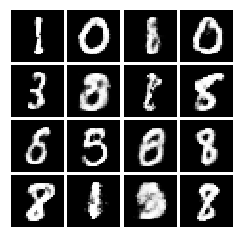

iter: 78000
D loss: 0.2772
G loss: 5.052



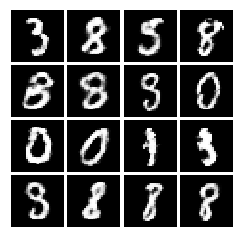

iter: 79000
D loss: 0.2549
G loss: 4.73



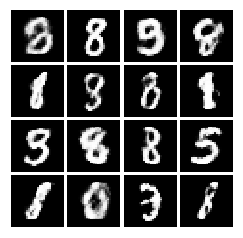

iter: 80000
D loss: 0.326
G loss: 3.99



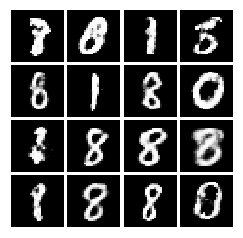

iter: 81000
D loss: 0.3462
G loss: 4.173



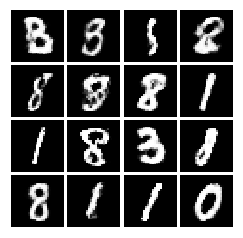

iter: 82000
D loss: 0.2825
G loss: 3.695



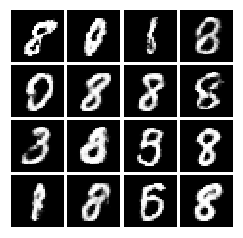

iter: 83000
D loss: 0.2552
G loss: 4.469



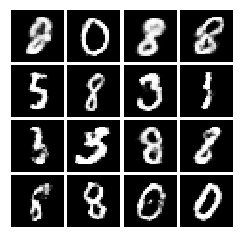

iter: 84000
D loss: 0.2972
G loss: 4.897



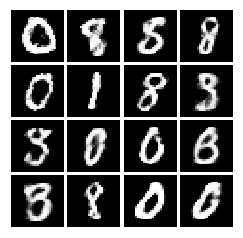

iter: 85000
D loss: 0.2486
G loss: 3.96



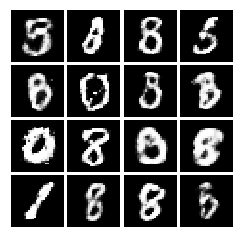

iter: 86000
D loss: 0.3503
G loss: 3.783



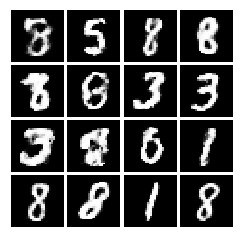

iter: 87000
D loss: 0.2789
G loss: 4.662



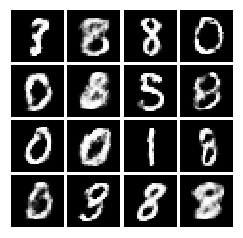

iter: 88000
D loss: 0.3058
G loss: 4.896



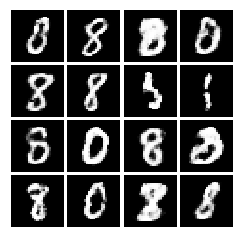

iter: 89000
D loss: 0.2661
G loss: 4.867



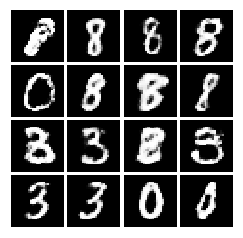

iter: 90000
D loss: 0.2426
G loss: 4.92



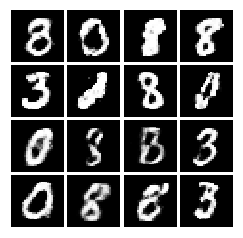

iter: 91000
D loss: 0.2567
G loss: 3.997



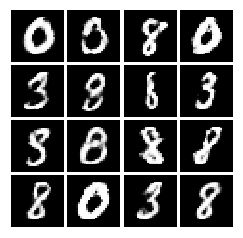

iter: 92000
D loss: 0.2669
G loss: 4.066



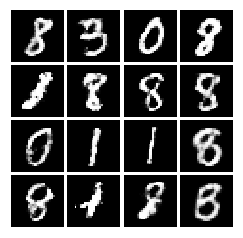

iter: 93000
D loss: 0.2446
G loss: 4.539



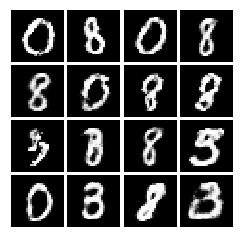

iter: 94000
D loss: 0.2206
G loss: 4.678



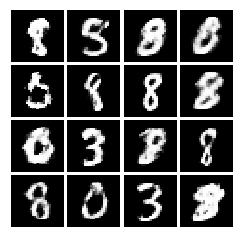

iter: 95000
D loss: 0.2677
G loss: 4.532



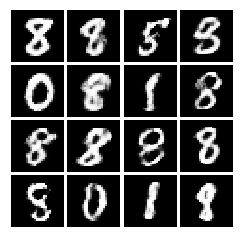

iter: 96000
D loss: 0.2779
G loss: 4.129



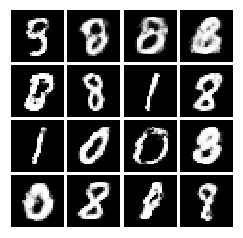

iter: 97000
D loss: 0.303
G loss: 4.751



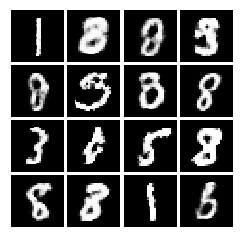

iter: 98000
D loss: 0.2691
G loss: 4.327



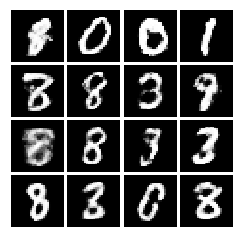

iter: 99000
D loss: 0.2902
G loss: 4.484



In [20]:
i = 0

for it in range(100000):
    if it%1000 == 0 :
        samples = sess.run(G_sample, feed_dict={Z: sample_Z(16, Z_dim)})
        
        fig = plot(samples)
        plt.savefig('out/{}.png'.format(str(i).zfill(3)), bbox_inches='tight')
        i+=1
        plt.show()
        plt.close(fig)
    

    X_mb, _ = mnist.train.next_batch(batch_size)
    _, D_loss_curr = sess.run([D_solver, D_loss], feed_dict={X: X_mb, Z: sample_Z(batch_size, Z_dim)})
        
    _, G_loss_curr = sess.run([G_solver, G_loss], feed_dict={Z: sample_Z(batch_size, Z_dim)})
    
    if it%1000 == 0:
        print('iter: {}'.format(it))
        print('D loss: {:.4}'.format(D_loss_curr))
        print('G loss: {:.4}'.format(G_loss_curr))
        print()
        
    